In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data analysis and preparation

In [2]:
df = pd.read_csv("Salary_Data.csv")
print(df.columns)
df.head(10)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [3]:
columns = ['age', 'gender', 'education_level', 'job_title', 'experience',
       'salary']
df.columns = columns
print(df.shape)
print(df.dtypes)
df.isna().sum()

(6704, 6)
age                float64
gender              object
education_level     object
job_title           object
experience         float64
salary             float64
dtype: object


age                2
gender             2
education_level    3
job_title          2
experience         3
salary             5
dtype: int64

In [4]:
df = df.drop_duplicates()
df.shape


(1792, 6)

In [5]:
# Удалить строки, у которых все значения NaN
df = df.dropna(how='all')
df.shape

(1791, 6)

In [6]:
df.age = df.age.fillna(df.age.mean())
df.experience = df.experience.fillna(df.experience.mean())
df.salary = df.salary.fillna(df.salary.mean())
df.isna().sum()

age                0
gender             0
education_level    1
job_title          0
experience         0
salary             0
dtype: int64

### Processing education level

In [7]:
df['education_level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", nan, 'High School', 'phD'], dtype=object)

In [8]:
df['education_level'] = df['education_level'].str.strip().str.lower()
df['education_level'] = df['education_level'].replace({
    "bachelor's": "bachelor's",
    "bachelor's degree": "bachelor's",
    "master's": "master's",
    "master's degree": "master's",
    "phd": "phd",
    "high school": "high school"
})
df['education_level'].unique()

array(["bachelor's", "master's", 'phd', nan, 'high school'], dtype=object)

In [9]:
df['education_level'] = df['education_level'].fillna('unknown')
df['education_level'].unique()

array(["bachelor's", "master's", 'phd', 'unknown', 'high school'],
      dtype=object)

In [10]:
df['education_level'] = df['education_level'].map({
    'unknown': 0,
    'high school': 1,
    "bachelor's": 2, 
    "master's": 3, 
    'phd': 4
})
df.head()

,age,gender,education_level,job_title,experience,salary
0,32.0,Male,2,Software Engineer,5.0,90000.0
1,28.0,Female,3,Data Analyst,3.0,65000.0
2,45.0,Male,4,Senior Manager,15.0,150000.0
3,36.0,Female,2,Sales Associate,7.0,60000.0
4,52.0,Male,3,Director,20.0,200000.0


### Processing gender

In [11]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df['gender'] = df['gender'].map({
    'Male': 0, 
    'Female': 1, 
    'Other': 2
})
df.head()

,age,gender,education_level,job_title,experience,salary
0,32.0,0,2,Software Engineer,5.0,90000.0
1,28.0,1,3,Data Analyst,3.0,65000.0
2,45.0,0,4,Senior Manager,15.0,150000.0
3,36.0,1,2,Sales Associate,7.0,60000.0
4,52.0,0,3,Director,20.0,200000.0


In [12]:
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)


(1791, 6)
age                0
gender             0
education_level    0
job_title          0
experience         0
salary             0
dtype: int64
age                float64
gender               int64
education_level      int64
job_title           object
experience         float64
salary             float64
dtype: object


In [13]:
df['gender'] = df['gender'].astype(float)
df['education_level'] = df['education_level'].astype(float)
df.dtypes

age                float64
gender             float64
education_level    float64
job_title           object
experience         float64
salary             float64
dtype: object

In [15]:
df.head()

,age,gender,education_level,job_title,experience,salary
0,32.0,0.0,2.0,Software Engineer,5.0,90000.0
1,28.0,1.0,3.0,Data Analyst,3.0,65000.0
2,45.0,0.0,4.0,Senior Manager,15.0,150000.0
3,36.0,1.0,2.0,Sales Associate,7.0,60000.0
4,52.0,0.0,3.0,Director,20.0,200000.0


### Processing job_title

In [14]:
df['job_title'] = df['job_title'].str.strip().str.lower()
df['job_title'].unique()

array(['software engineer', 'data analyst', 'senior manager',
       'sales associate', 'director', 'marketing analyst',
       'product manager', 'sales manager', 'marketing coordinator',
       'senior scientist', 'software developer', 'hr manager',
       'financial analyst', 'project manager', 'customer service rep',
       'operations manager', 'marketing manager', 'senior engineer',
       'data entry clerk', 'sales director', 'business analyst',
       'vp of operations', 'it support', 'recruiter', 'financial manager',
       'social media specialist', 'software manager', 'junior developer',
       'senior consultant', 'product designer', 'ceo', 'accountant',
       'data scientist', 'marketing specialist', 'technical writer',
       'hr generalist', 'project engineer', 'customer success rep',
       'sales executive', 'ux designer', 'operations director',
       'network engineer', 'administrative assistant',
       'strategy consultant', 'copywriter', 'account manager',
      

In [15]:
job_counts = df['job_title'].value_counts()
print(job_counts)

job_title
software engineer manager    127
full stack engineer          123
senior software engineer      96
senior project engineer       95
back end developer            81
                            ... 
financial advisor              1
junior designer                1
chief technology officer       1
technical recruiter            1
delivery driver                1
Name: count, Length: 192, dtype: int64


# Building a model and choosing the best one

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error, r2_score, confusion_matrix
from scipy.stats import skew, kurtosis, iqr
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor

### Model with job_title

In [17]:
df_job_title = pd.get_dummies(df, columns=['job_title'], drop_first=True)
print(df_job_title.shape)
df_job_title.head()

(1791, 196)


,age,gender,education_level,experience,salary,job_title_accountant,job_title_administrative assistant,job_title_back end developer,job_title_business analyst,job_title_business development manager,...,job_title_supply chain manager,job_title_technical recruiter,job_title_technical support specialist,job_title_technical writer,job_title_training specialist,job_title_ux designer,job_title_ux researcher,job_title_vp of finance,job_title_vp of operations,job_title_web developer
0,32.0,0.0,2.0,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,1.0,3.0,3.0,65000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,0.0,4.0,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,1.0,2.0,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,0.0,3.0,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
X = df_job_title.drop('salary', axis=1)
y = df_job_title['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1)).flatten()


In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural network': MLPRegressor(random_state=42, max_iter=1000)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R^2': r2})

df_results = pd.DataFrame(results)
df_results

,Model,MSE,R^2
0,Linear Regression,1.521950e+23,-1.521950e+23
1,Random Forest,9.621927e-02,9.037807e-01
2,Gradient Boosting,1.127342e-01,8.872658e-01
3,Support Vector Regressor,1.779497e-01,8.220503e-01
4,Neural network,1.126320e-01,8.873680e-01


### Visualization of results

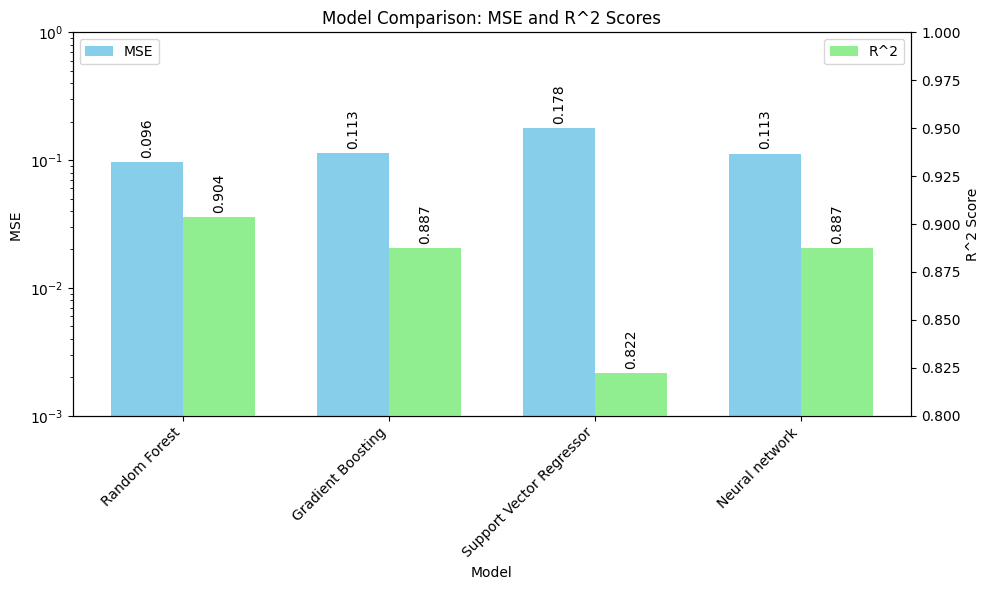

In [21]:
df_results_v = df_results[df_results['Model'] != 'Linear Regression']

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

width = 0.35

x = np.arange(len(df_results_v))

# Создаем столбцы для MSE и R^2
rects1 = ax1.bar(x - width/2, df_results_v['MSE'], width, label='MSE', color='skyblue')
rects2 = ax2.bar(x + width/2, df_results_v['R^2'], width, label='R^2', color='lightgreen')

ax1.set_ylabel('MSE ')
ax1.set_xlabel('Model')
ax2.set_ylabel('R^2 Score')

ax1.set_xticks(x)
ax1.set_xticklabels(df_results_v['Model'], rotation=45, ha='right')

ax1.set_yscale('log')
ax1.set_ylim(1e-3, 1)  # Устанавливаем пределы для MSE
ax2.set_ylim(0.8, 1) 

def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1, ax1)
autolabel(rects2, ax2)

ax1.legend(loc ='upper left')
ax2.legend(loc ='upper right')

plt.title('Model Comparison: MSE and R^2 Scores')
plt.tight_layout()
plt.show()

# Conclusion for the model with job title

**Linear Regression:**
- MSE: 1.521950e+23
- R^2: -1.521950e+23  
- Эти результаты указывают на серьезные проблемы с линейной регрессией. Огромное значение MSE и отрицательное R^2 говорят о том, что модель работает хуже, чем простое предсказание среднего значения. Возможно, есть проблемы с мультиколлинеарностью или данные имеют сильно нелинейную природу.


**Random Forest:**
- MSE: 9.621927e-02
- R^2: 9.037807e-01
- Очень хорошие результаты. Низкое MSE и высокий R^2 показывают, что модель объясняет более 90% вариации в данных.


**Gradient Boosting:**
- MSE: 1.127342e-01
- R^2: 8.872658e-01 
- Также хорошие результаты, немного уступающие Random Forest.


**Support Vector Regressor:**
- MSE: 1.779497e-01
- R^2: 8.220503e-01
- Хорошие результаты, но немного хуже, чем у ансамблевых методов.


**Neural Network:**
- MSE: 1.126320e-01
- R^2: 8.873680e-01
- Результаты очень близки к Gradient Boosting, показывая хорошую производительность.


### Model without job_title

In [22]:
X = df.drop(['salary', 'job_title'], axis=1)
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1)).flatten()

In [23]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural network': MLPRegressor(random_state=42, max_iter=1000)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R^2': r2})

df_results_2 = pd.DataFrame(results)
df_results_2

,Model,MSE,R^2
0,Linear Regression,0.271739,0.728261
1,Random Forest,0.205521,0.794479
2,Gradient Boosting,0.200901,0.799099
3,Support Vector Regressor,0.214020,0.785980
4,Neural network,0.204852,0.795148


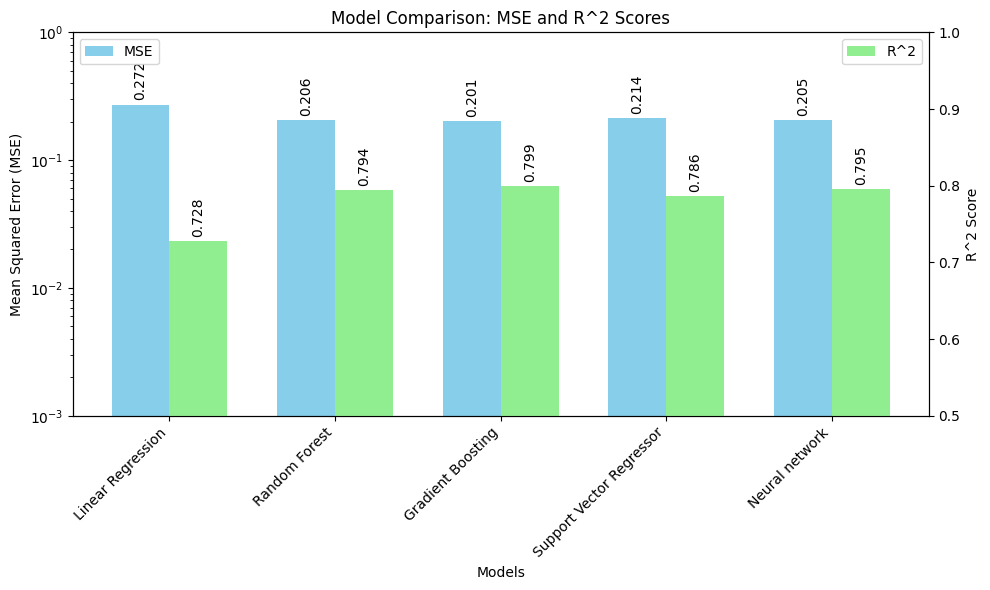

In [25]:
# Создаем фигуру с двумя осями Y
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Ширина столбцов
width = 0.35

# Позиции для столбцов
x = np.arange(len(df_results_2))

# Создаем столбцы для MSE и R^2
rects1 = ax1.bar(x - width/2, df_results_2['MSE'], width, label='MSE', color='skyblue')
rects2 = ax2.bar(x + width/2, df_results_2['R^2'], width, label='R^2', color='lightgreen')

# Настройка осей и меток
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax2.set_ylabel('R^2 Score')

ax1.set_xticks(x)
ax1.set_xticklabels(df_results['Model'], rotation=45, ha='right')

ax1.set_yscale('log')  # Логарифмическая шкала для MSE
ax1.set_ylim(1e-3, 1)  # Устанавливаем пределы для MSE
ax2.set_ylim(0.5, 1)   # Устанавливаем пределы для R^2

# Добавляем значения на столбцы
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1, ax1)
autolabel(rects2, ax2)

# Добавляем легенду
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Comparison: MSE and R^2 Scores')
plt.tight_layout()
plt.show()

# Conclusion for the model without job title


**Linear Regression:**
- MSE: 0.271739	
- R^2: 0.728261
- показывает наихудшие результаты среди всех моделей, но все еще демонстрирует приемлемую производительность.


**Random Forest:**
- MSE: 90.205521	
- R^2: 0.794479


**Gradient Boosting:**
- MSE: 0.200901
- R^2: 0.799099
- показывает лучшие результаты с наименьшим MSE(0.200901) и наивысшим R^2(0.799099). 


**Support Vector Regressor:**
- MSE: 0.214020	
- R^2: 0.785980
-  показывает хорошие результаты, но немного уступает трем предыдущим моделям. 


**Neural Network:**
- MSE: 0.204852	
- R^2: 0.795148


Выводы:
- Все модели имеют MSE меньше 0.3, что хорошо для стандартизированных данных.
- Меньшие значения MSE указывают на лучшую точность предсказаний.
- Все модели имеют R^2 выше 0.72, что указывает на хорошую объяснительную способность.
- Значения R^2 близки к 0.8, что означает, что модели объясняют около 80% вариации в данных.

# Comparison of the best performance of models

### Model with job title:
**Random Forest:**
- MSE: 9.621927e-02
- R^2: 9.037807e-01


### Model without job title:
**Gradient Boosting:**
- MSE: 0.200901
- R^2: 0.799099



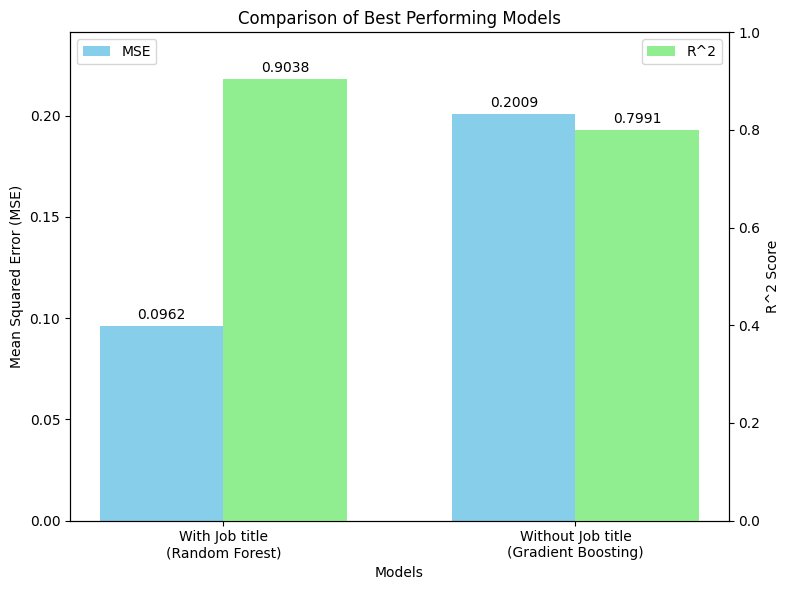

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
models = ['With Job title\n(Random Forest)', 'Without Job title\n(Gradient Boosting)']
mse = [9.621927e-02, 0.200901]
r2 = [9.037807e-01, 0.799099]

# Создаем фигуру с двумя осями Y
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# Ширина столбцов
width = 0.35

# Позиции для столбцов
x = np.arange(len(models))

# Создаем столбцы для MSE и R^2
rects1 = ax1.bar(x - width/2, mse, width, label='MSE', color='skyblue')
rects2 = ax2.bar(x + width/2, r2, width, label='R^2', color='lightgreen')

# Настройка осей и меток
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax2.set_ylabel('R^2 Score')

ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax1.set_ylim(0, max(mse) * 1.2)  # Устанавливаем пределы для MSE
ax2.set_ylim(0, 1)  # Устанавливаем пределы для R^2

# Добавляем значения на столбцы
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

# Добавляем легенду
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Comparison of Best Performing Models')
plt.tight_layout()
plt.show()

- Модель Random Forest с учетом должности имеет более низкое MSE и более высокий R^2, что указывает на лучшую производительность.
- Модель Gradient Boosting без учета должности также показывает хорошие результаты, но уступает модели с учетом должности.